# Feeling Bitcoin

In this assignment, you will investigate the changing sentiment of Twitter users when it comes to one of its most buzzworthy topics: Bitcoin. Your firm currently sells products exclusively online and is researching whether now is the right time to incorporate cryptocurrencies as a payment method. While another member on the team is focused on crunching the financial numbers, you are tasked with trying to capture how the market _feels_ about bitcoin in the present moment.

To that end, you have been tasked to:

- Use the VADER model to calculate the proportion of positive, negative, and neutral Twitter comments made during the time period of the dataset.
- Investigate the adjectives most often used by users when discussing bitcoin in order to understand the type of language used in the crypto space.

To complete this task you will be given a csv of tweets that reference or use the #bitcoin hashtag over the last few years. One of your teammates has already done the work of cleaning the data in the file. Your team would like you to use the **NLTK** library to analyze how many of those tweets contain positive, negative, and neutral sentiments, respectively, in order to approximate market sentiment. You will then analyze the most frequent adjectives used in those tweets for marketing to associate with the company's messaging.

In [1]:
# Libraries Needed
import spacy
import en_core_web_sm
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
from collections import Counter

## Part 1: Vader Model

### Preparing Data and Model

To get started with our analysis, we'll need to first instantiate the VADER model and fill it with the appropriate lexicon in order to use with our data. We'll also need to import our data from the csv file we received.

- Use NLTK to `.download()` the `vader_lexicon` in order to set up the rules for nltk to appropriately score words
- Instantiate a `SentimentIntensity Analyzer` into a variable `analyzer`
- Use pandas' `.read_csv()` to read in the cleaned data to a variable `df`

In [3]:
# TODO: Use NLTK's download method to download the vader lexicon
nltk.download('vader_lexicon')
# TODO: Instantiate the SentimentIntensityAnalyzer into a variable analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/MacBookPro/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
# TODO: Read in the tweets.csv file to a variable df
df = pd.read_csv('Tweets.csv')
# TODO: Preview the df using .head()
df.head()

,Unnamed: 0.1,Unnamed: 0,id,timestamp,user,replies,likes,retweets,text
0,105027,5625766,9.393023e+17,2017-12-09 00:14:51+00,BitcoinPoll,0.0,0.0,0.0,$LTC to doubled its value soon? #Litecoins #bi...
1,36386,2251044,8.857079e+17,2017-07-14 01:49:54+00,aimanstronk_,0.0,0.0,0.0,Tukar ke bitcoin. Lpstu tukar bitcoin ke RM. s...
2,141547,3797663,9.607030e+17,2018-02-06 01:33:36+00,WBlizters,0.0,1.0,0.0,I got 3 bitcoin for my pancreas
3,52671,4354916,9.172289e+17,2017-10-09 01:22:54+00,JAIROGLYPHIC_JR,0.0,0.0,0.0,@GenesisMining when will there be more btc min...
4,61020,4250362,9.176055e+17,2017-10-10 02:19:46+00,sskknn00,0.0,0.0,0.0,"yep they are not calling btc-core BTC, how dar..."


### Calculating Polarity

Next, we'll move into calculating the polarity scores for the various rows of text. We'll first grab a single row of the dataset to run on the `.polarity_scores()` function of the `analyzer` in order to make sure we have set up everything correctly. From there, we'll scale up to calculating the polarity scores for the entire dataset before moving into analyzing the distribution of sentiment.

- Create a `sample_text` variable by selecting the text column from the data on the first row
- Use the analyzer's `.polarity_scores()` method to score the `sample_text`. Note the value returned is a dictionary
- Create a new variable `text_data` from the "text" column in `df`. Ensure that the data in the column is a string by using .astype() with the "str" argument.
- Use the .apply() method on `text_data` to use a analyzer.polarity_scores on each row of the `text_data` column. Store the result into a new variable `raw_scores`
- Use the `list()` method to cast `raw_scores` as a list, and then make a new dataframe using `pd.DataFrame()`. Store this into a variable `scores_df`
- Preview `scores_df` using .head()
- Create a new column for `df` called "compound_sentiment" using the `scores_df` column for `"compound"`
- Preview the updated `df` dataframe

In [5]:
# TODO: Select a single row from the dataframe and select the text column. Store this as a variable `sample_text`
sample_text = df.loc[0,'text']
# TODO: calculate polarity scores for the `sample_text`
analyzer.polarity_scores(sample_text)

{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.34}

In [6]:
# TODO: create a series of the "text" column from the `df` dataframe. store this to a variable text_data
text_data = df['text']
# TODO: calculate polarity scores for all rows of the `text` column using .apply() and store in a new variable called "raw_scores". Make sure that you use a lambda function with polarity scores, and that you cast the row as a string using str().
raw_scores = text_data.apply(lambda x:analyzer.polarity_scores(str(x))) 
# TODO: create a new dataframe `scores_df` by casting `raw_scores` as a list, then using `pd.DataFrame()` on the new list
scores_df = pd.DataFrame(list(raw_scores))
# TODO: Preview `scores_df` using .head()
scores_df.head()

,neg,neu,pos,compound
0,0.000,0.769,0.231,0.3400
1,0.000,0.888,0.112,0.2263
2,0.000,1.000,0.000,0.0000
3,0.000,1.000,0.000,0.0000
4,0.432,0.480,0.088,-0.8622


In [7]:
# TODO: create a new column `"compound_sentiment"` on the `df` dataframe from the `scores_df`'s column for `"compound"`
df['compound_sentiment']= scores_df['compound']

In [8]:
# TODO: preview results with head. You should have a new compound_sentiment column.
df.head()

,Unnamed: 0.1,Unnamed: 0,id,timestamp,user,replies,likes,retweets,text,compound_sentiment
0,105027,5625766,9.393023e+17,2017-12-09 00:14:51+00,BitcoinPoll,0.0,0.0,0.0,$LTC to doubled its value soon? #Litecoins #bi...,0.3400
1,36386,2251044,8.857079e+17,2017-07-14 01:49:54+00,aimanstronk_,0.0,0.0,0.0,Tukar ke bitcoin. Lpstu tukar bitcoin ke RM. s...,0.2263
2,141547,3797663,9.607030e+17,2018-02-06 01:33:36+00,WBlizters,0.0,1.0,0.0,I got 3 bitcoin for my pancreas,0.0000
3,52671,4354916,9.172289e+17,2017-10-09 01:22:54+00,JAIROGLYPHIC_JR,0.0,0.0,0.0,@GenesisMining when will there be more btc min...,0.0000
4,61020,4250362,9.176055e+17,2017-10-10 02:19:46+00,sskknn00,0.0,0.0,0.0,"yep they are not calling btc-core BTC, how dar...",-0.8622


### Analyze Sentiment

Now that we've calculated sentiment scores for our sample, we can now move onto analyzing the results. We'll first plot the density of scores so that we can visualize if there is overweighting to one side or another in terms of sentiment, before calculating the number of rows that have positive or negative sentiment.

<AxesSubplot:ylabel='Density'>

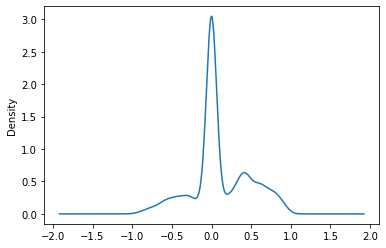

In [9]:
# TODO: create a density plot of compound sentiment column
df['compound_sentiment'].plot(kind='density')

At this point, would you say that your sample is more positive or negative in sentiment?
> More positive

In [10]:
# TODO: .count() rows with compound_sentiment above 0.5
df[df["compound_sentiment"] > 0.5].count()

Unnamed: 0.1          1005
Unnamed: 0            1005
id                    1005
timestamp             1005
user                  1005
replies               1005
likes                 1005
retweets              1005
text                  1005
compound_sentiment    1005
dtype: int64

In [11]:
# TODO: .count() rows with compound_sentiment below -0.5
df[df["compound_sentiment"] < -0.5].count()

Unnamed: 0.1          350
Unnamed: 0            350
id                    350
timestamp             350
user                  350
replies               350
likes                 350
retweets              350
text                  350
compound_sentiment    350
dtype: int64

Are more of your tweet positive or negative?
> Positive

Would you consider your weighting of positive or negative to be _overwhelmingly_ one direction or another? For context, recall that typically the vast majority of text will have a neutral tone in VADER sentiment analysis.
> Not overwhelmingling

----

## Part 2: Spacy Word Dependency Analysis

### Spacy Model Setup

We'll now move into identifying the most frequently used adjectives for this particular cryptocurrency. Where we previously captured the sentiment using the VADER model in nltk and allows us to explore the overall feeling of communications, the spacy library can enable us to explore the specific words that people use in conjunction. 

In our assignment, we're interested in how people are describing bitcoin and cryptocurrencies as a whole so that our marketing department can develop copy around language commonly used by users in the space.

We'll first instantiate our spacy model and load the English toolkit, before moving on to define our list of nouns that are relevant to our search for adjectives. 

- Instantiate a `spacy_model` variable using the .load() function in `spacy`, utilizing the "en_core_web_sm" language library.
- Create a list of the ways that the nouns for bitcoin and cryptocurrencies may be represented in language in this dataset. Common occurances would be "btc", "bitcoin", "crypto", and "cryptocurrency", but feel free to add your own! Be wary of adding more than six nouns to the list, however, as the longer you make this list, the longer it will take to search your corpus. In a more realistic analysis, you would have the resources to try a longer set of variations on these words.

In [12]:
# TODO: Instantiate a spacy model with .load() and use "en_core_web_sm"
spacy_model = spacy.load("en_core_web_sm")

In [13]:
# TODO: Create a list of the ways "bitcoin" may be represented in text, and store in a variable bitcoin_words.
bitcoin_words = [
    "btc", "bitcoin", "crypto","cryptocurrency", "digital currency", "decentralized currency"  
]

In [14]:
# Nothing to do here, your function is already created!
# Provided Code -- Do NOT Edit!
def bitcoin_adjectives(corpus, target_words, expressive):
    
    # Extracts adjectives describing a set of target words within a corpus, and returns a list of all of the results    
    results = []
    
    for doc in corpus:
        for token in spacy_model(doc):
        
            if(expressive):
                print(token.text)
                print(token.pos_)
                print(token.head.text)
                print("")

            if token.pos_ == "ADJ" and token.head.text in target_words:
                results.append(token.text)
                
    return results

### Using our Function

We're finally ready to get started running our function! We'll first run it against a sample bit of text to confirm it works as expected. Pass the provided passage as an a rgument into the `bitcoin_adjectives` function.

- Store the passage into a variable called `test_text`.
- Pass the variable along with the `bitcoin_words` array into the `bitcoin_adjectives` function.
- Note the array of adjectives returned. 

*Provided Passages*
"The investors leaped for joy at their enormously profitable bitcoin."

In [15]:
# TODO: Create a variable called `test_text` to store the provided passage within an array. 
test_text = ("The investors leaped for joy at their enormously profitable bitcoin.")

In [16]:
# TODO: Pass the necessary variables into the bitcoin_adjectives function to test and display your results. 
bitcoin_adjectives([test_text], bitcoin_words, expressive=True)

The
DET
investors

investors
NOUN
leaped

leaped
VERB
leaped

for
ADP
leaped

joy
NOUN
for

at
ADP
leaped

their
PRON
bitcoin

enormously
ADV
profitable

profitable
ADJ
bitcoin

bitcoin
NOUN
at

.
PUNCT
leaped



['profitable']

### Spacy model scale-up

In the next steps, we'll repeat our usage of `bitcoin_adjectives()` for the entire dataset. We'll store the results of this function into a variable `adjectives`, and use the `Counter()` class from the `collections` library to help us find the `most_common()` adjectives used in the dataset.

- Select the "text" column of the `df` dataframe, and store as a variable `text_data`
- Call `bitcoin_adjectives()` on the full dataset by passing the arguments for `text_data` and `bitcoin_words`. Make sure to store the results to a variable `adjectives`. **WARNING: This is a computationally heavy step - make sure your computer is plugged in, and be prepared to wait for a bit on this step**
- The results in adjectives may look like text, but are in fact `spacy` tokens. Loop over the `adjectives` list and extract the token's `text` property, and force it to lower-case using `.lower()`. This can be accomplished with either a traditional for loop or a list comprehension, which we have shown in class. Make sure to store the results into a variable `adjective_extract`
- Use `Counter()` on the `adjective_extract` variable, and store the result into a variable `counter`.
- Use the `most_common()` method on `counter` to produce a list of the most commonly used adjectives, with their frequencies.



In [17]:
# TODO: Select the "text" column of df, and store as a variable text_data
text_data = df['text']
# TODO: Use bitcoin_adjectives on your sample data, and store the results into a variable "adjectives"
adjectives = bitcoin_adjectives(text_data, bitcoin_words, expressive=False)
# TODO: Display the adjectives list you generate.  
adjectives

['fastest',
 'bitcoin',
 'legal',
 'ripple',
 'whole',
 'least',
 'bullish',
 'ETHEREUM',
 'square',
 'small',
 'albania',
 '1hr',
 'UGT',
 'political',
 'free',
 'original',
 'Serious',
 'single',
 'square',
 'Litecoin',
 'X2',
 'scr4sat',
 'free',
 '@realDonaldTrump',
 'first',
 'major',
 'crypto',
 'Forgot',
 'freetoken',
 'next',
 'crypto',
 'roundtable',
 'bitcoin',
 'hodl',
 'large',
 'illegal',
 'cryptocurrencypic.twitter.com/NxnNiDQ3QJ',
 'crypto',
 'free',
 'industrial',
 'first',
 'financial',
 '@jimcramer',
 'higher',
 'daily',
 'triplicamos',
 'many',
 'crypto',
 'regale',
 'free',
 'digital',
 'free',
 'short',
 'safe',
 'largest',
 'other',
 'outta',
 'good',
 'crypto',
 'real',
 'theboss',
 'enough',
 'hodl',
 'bitcoin',
 'little',
 'healthy',
 'alternative',
 'short',
 're',
 'crypto',
 'whole',
 'old',
 'bitconnect',
 'Crypto',
 'Ripple',
 'IoT',
 'bitcoin',
 'free',
 'popular',
 'open',
 'ripple',
 'i.e',
 'short',
 'other',
 'makeyourownlane',
 'pic.twitter.com/DC5o0

In [18]:
# TODO: Extract the lowercase text of the token for each token in the adjectives list into a new variable `adjective_extract`
adjective_extract = []
for adjective in text_data:
    adjective_extract_doc = spacy_model(adjective.lower())


    for token in adjective_extract_doc:
        if token.pos_ =="ADJ" and token.head.text == "bitcoin":
            adjective_extract.append(token.text)

# TODO: Instantiate a new Counter() using `adjective_extract`, and store into a variable `counter`
counter = Counter(adjective_extract)
# TODO: Use counter's .most_common() method to view the top 100 most frequently used modifiers of the noun bitcoin
counter.most_common(100)

[('bitcoin', 18),
 ('crypto', 14),
 ('free', 13),
 ('btcusd', 6),
 ('short', 6),
 ('much', 5),
 ('ripple', 5),
 ('worth', 4),
 ('complete', 4),
 ('more', 4),
 ('litecoin', 4),
 ('whole', 3),
 ('new', 3),
 ('many', 3),
 ('blockchain', 3),
 ('global', 3),
 ('digital', 3),
 ('giveaway', 2),
 ('least', 2),
 ('fuckfiatcurrency', 2),
 ('small', 2),
 ('original', 2),
 ('serious', 2),
 ('single', 2),
 ('next', 2),
 ('illegal', 2),
 ('ultima', 2),
 ('good', 2),
 ('hodl', 2),
 ('enough', 2),
 ('dlt', 2),
 ('old', 2),
 ('bitconnect', 2),
 ('high', 2),
 ('bullish', 2),
 ('available', 2),
 ('fastest', 1),
 ('fyi', 1),
 ('easy', 1),
 ('likely', 1),
 ('albania', 1),
 ('blockchainpic.twitter.com/k3so1purzw', 1),
 ('profitable', 1),
 ('political', 1),
 ('bithumb', 1),
 ('poloniexpic.twitter.com/loszmuenrc', 1),
 ('similar', 1),
 ('scr4sat', 1),
 ('coinfest', 1),
 ('crazy', 1),
 ('unused', 1),
 ('mine', 1),
 ('industrial', 1),
 ('financial', 1),
 ('@jimcramer', 1),
 ('cryptocurrencypic.twitter.com/7hfih